In [50]:
# Import useful libraries used in the notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Show plots inline 
%matplotlib inline

# Auto-reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# Read in the dataset, look at the column names and NAs
credit_df = pd.read_csv('cs-training.csv')
credit_df.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [52]:
# Need to do a bit of basic cleanup:

# Clean up the column names so it fits on one page width !
credit_df.columns = ['ID', 'target', 'revolving_pct', 'age', 
                     '30-59_past_due', 'debt_ratio', 
                     'monthly_income', 'lines', 
                     'gt_90_past_due', 'mortgages', 
                    '60-89_past_due', 'dependents']

# Replace missing values with 0 
# (quick-n-dirty ! Should try imputation or reserved value for trees)
credit_df[credit_df.isnull()] = 0

# Convert dependents to an int
credit_df['dependents'] = credit_df['dependents'].astype('int64')

# Check how the data looks now
credit_df.head()

,ID,target,revolving_pct,age,30-59_past_due,debt_ratio,monthly_income,lines,gt_90_past_due,mortgages,60-89_past_due,dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0


In [53]:
# Create training and test data
y = credit_df['target']
id_val = credit_df['ID']
X = credit_df.drop(['target'], axis=1)
X = credit_df.drop(['ID'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(credit_df, y, test_size=0.5)


# T-SNE is hugely memory memory intensive ! Use random undersampling on majority class
x_min = X[y == 1]
x_maj = X[y == 0]

num_maj = X_maj.shape[0]
num_min = X_min.shape[0]
x_maj_idx = np.random.randint(num_maj, size=num_min)
x_maj_undersamp = x_maj.loc[:num_min,:]

# Combine minority and balanced majority examples
x_undersamp = np.vstack((x_min, x_maj_undersamp))
y_undersamp = np.vstack(np.array(([1] * x_min.shape[0]) + ([0] * x_maj_undersamp.shape[0])))
y_undersamp = np.squeeze(y_undersamp)




print X_min.shape
print X_maj.shape

# # Do some data visualizations
X_tsne = TSNE(n_components=2, perplexity=40, learning_rate=100, verbose=3).fit_transform(x_undersamp)
X_pca = PCA().fit_transform(X)




(10026, 11)
(139974, 11)
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 19411
[t-SNE] Computed conditional probabilities for sample 2000 / 19411
[t-SNE] Computed conditional probabilities for sample 3000 / 19411
[t-SNE] Computed conditional probabilities for sample 4000 / 19411
[t-SNE] Computed conditional probabilities for sample 5000 / 19411
[t-SNE] Computed conditional probabilities for sample 6000 / 19411
[t-SNE] Computed conditional probabilities for sample 7000 / 19411
[t-SNE] Computed conditional probabilities for sample 8000 / 19411
[t-SNE] Computed conditional probabilities for sample 9000 / 19411
[t-SNE] Computed conditional probabilities for sample 10000 / 19411
[t-SNE] Computed conditional probabilities for sample 11000 / 19411
[t-SNE] Computed conditional probabilities for sample 12000 / 19411
[t-SNE] Computed conditional probabilities for sample 13000 / 19411
[t-SNE] Computed 

/Users/tim/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 150000 but corresponding boolean dimension is 19411
/Users/tim/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 150000 but corresponding boolean dimension is 19411


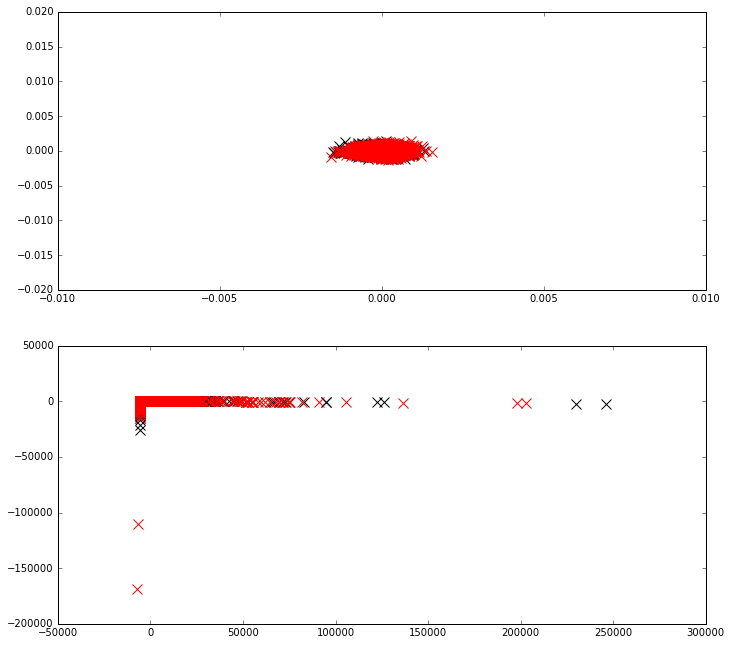

In [60]:
from pylab import rcParams

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
rcParams['figure.figsize'] = (10.0, 10.0)

plt.subplot(211)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_undersamp, cmap = plt.get_cmap("Reds"))
plt.scatter(X_tsne[y_undersamp == 0][:, 0], X_tsne[y_undersamp == 0][:, 1], s=100, marker = "x", color="black")
plt.scatter(X_tsne[y_undersamp == 1][:, 0], X_tsne[y_undersamp == 1][:, 1], s=100, marker = "x", color="red")

plt.subplot(212)
plt.scatter(X_pca[y_undersamp == 0][:, 0], X_pca[y_undersamp == 0][:, 1], s=100, marker = "x", color="black")
plt.scatter(X_pca[y_undersamp == 1][:, 0], X_pca[y_undersamp == 1][:, 1], s=100, marker = "x", color="red")


# # print y[y==0].shape
# print X[y==0].shape
# print X[y==1].shape
# print X_pca.shape
# print X.shape
# print X_pca.shape
# print X_pca.shape

# print (y==0).shape

In [13]:
X_pca.shape

(150000, 11)

In [35]:
# Train a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)